In [1]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from pyensae import download_data
import pandas as pd
from pyquickhelper.filehelper import un7zip_files
import os
import shapefile
from matplotlib.collections import LineCollection
from matplotlib import cm
import shapefile
import math

In [2]:
df_densites_metiers = pd.read_csv("data/densites_metiers.csv", sep = ";", encoding='latin_1', skiprows=4)
df_densites_metiers = df_densites_metiers[1:] #take the data less the header row
df_densites_metiers = df_densites_metiers.rename(columns={'SPECIALITE': 'Departement'})
print(len(df_densites_metiers))
df_densites_metiers.head()

122


,Departement,Ensemble des spécialités d'exercice,Spécialistes,Anatomie et cytologie pathologiques,Anesthésie-réanimation,Biologie médicale,Cardiologie et maladies vasculaires,Chirurgie générale,Chirurgie maxillo-faciale et stomatologie,Chirurgie orthopédique et traumatologie,...,Pneumologie,Psychiatrie,Radiodiagnostic et imagerie médicale,Radiothérapie,Réanimation médicale,Recherche médicale,Rhumatologie,Santé publique et médecine sociale,Généralistes,Médecine générale
1,FRANCE ENTIERE,336.8,182.7,2.4,17.0,4.5,10.5,5.4,1.8,4.9,...,4.5,22.9,13.2,1.3,0.5,0.0,4.0,2.6,154.1,154.1
2,FRANCE Métropolitaine,339.2,184.5,2.4,17.1,4.5,10.7,5.5,1.8,4.9,...,4.6,23.2,13.3,1.3,0.6,0.0,4.0,2.6,154.6,154.6
3,DOM-COM,264.0,126.3,1.3,14.0,3.5,6.8,3.3,0.8,2.9,...,2.6,13.1,8.5,0.8,0.3,0.0,1.4,2.9,137.7,137.7
4,Alsace-Champagne-Ardenne-Lorraine,319.9,169.5,2.0,16.8,4.0,10.5,6.0,0.8,4.9,...,4.3,17.6,12.7,1.3,0.7,0.0,3.4,2.4,150.4,150.4
5,Aquitaine-Limousin-Poitou-Charentes,334.4,168.8,2.4,16.4,4.5,10.8,5.1,1.6,5.0,...,3.7,21.7,12.6,1.4,0.4,0.0,3.3,2.3,165.6,165.6


In [3]:
df_densites_metiers["Departement"] = df_densites_metiers["Departement"].str.extract('(?P<digit>\d{2})', expand=False)
df_densites_metiers = df_densites_metiers.dropna(axis=0)
df_densites_metiers = df_densites_metiers.groupby(['Departement']).sum()
print(len(df_densites_metiers))
df_densites_metiers.head()

95


,Ensemble des spécialités d'exercice,Spécialistes,Anatomie et cytologie pathologiques,Anesthésie-réanimation,Biologie médicale,Cardiologie et maladies vasculaires,Chirurgie générale,Chirurgie maxillo-faciale et stomatologie,Chirurgie orthopédique et traumatologie,Chirurgie infantile,...,Pneumologie,Psychiatrie,Radiodiagnostic et imagerie médicale,Radiothérapie,Réanimation médicale,Recherche médicale,Rhumatologie,Santé publique et médecine sociale,Généralistes,Médecine générale
Departement,,,,,,,,,,,,,,,,,,,,,
01,188.0,81.1,0.5,6.6,1.4,3.8,1.4,0.8,2.4,0.0,...,1.7,10.6,6.9,0.5,0.5,0.0,1.9,0.9,106.9,106.9
02,229.6,115.3,0.9,7.1,2.0,6.3,3.3,0.7,4.6,0.0,...,4.8,12.1,8.4,0.9,0.7,0.0,3.0,0.7,114.3,114.3
03,277.9,135.6,0.9,11.6,2.0,8.1,4.1,1.2,5.8,0.0,...,4.4,14.5,10.8,1.7,0.6,0.0,4.7,0.9,142.3,142.3
04,305.7,119.1,1.8,9.8,3.1,8.0,0.6,0.6,5.5,0.0,...,2.5,16.0,9.2,0.0,0.0,0.0,2.5,0.6,186.6,186.6
05,425.0,189.0,2.1,24.2,4.3,9.9,5.0,0.7,9.2,0.0,...,9.9,12.8,14.9,1.4,0.0,0.0,2.8,5.0,236.0,236.0


In [4]:
df_densites_metiers.describe()

,Ensemble des spécialités d'exercice,Spécialistes,Anatomie et cytologie pathologiques,Anesthésie-réanimation,Biologie médicale,Cardiologie et maladies vasculaires,Chirurgie générale,Chirurgie maxillo-faciale et stomatologie,Chirurgie orthopédique et traumatologie,Chirurgie infantile,...,Pneumologie,Psychiatrie,Radiodiagnostic et imagerie médicale,Radiothérapie,Réanimation médicale,Recherche médicale,Rhumatologie,Santé publique et médecine sociale,Généralistes,Médecine générale
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,...,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,313.952632,158.242105,1.932632,14.860000,3.752632,9.352632,4.778947,1.384211,4.756842,0.327368,...,4.228421,19.073684,11.533684,1.138947,0.509474,0.008421,3.588421,2.151579,155.701053,155.701053
std,123.302423,77.031527,1.422422,8.128194,2.319521,3.917849,2.768704,1.042839,1.755760,0.468007,...,1.713753,10.959764,5.003501,0.740083,0.474470,0.031499,1.598794,2.097053,54.929689,54.929689
min,178.100000,73.400000,0.000000,4.700000,0.500000,2.600000,0.600000,0.000000,1.300000,0.000000,...,1.000000,8.900000,4.200000,0.000000,0.000000,0.000000,1.300000,0.000000,104.800000,104.800000
25%,246.500000,115.000000,0.900000,9.750000,2.200000,6.700000,2.950000,0.600000,3.900000,0.000000,...,3.000000,13.200000,8.400000,0.650000,0.200000,0.000000,2.500000,0.800000,133.550000,133.550000
50%,289.800000,140.100000,1.700000,12.700000,3.200000,9.100000,4.100000,1.200000,4.500000,0.100000,...,4.100000,16.800000,10.400000,1.100000,0.400000,0.000000,3.400000,1.400000,150.600000,150.600000
75%,349.450000,180.750000,2.500000,18.450000,4.700000,10.850000,6.400000,2.000000,5.550000,0.600000,...,5.200000,21.100000,13.450000,1.500000,0.700000,0.000000,4.450000,2.800000,167.100000,167.100000
max,1168.700000,586.400000,9.500000,59.400000,15.500000,27.300000,16.700000,7.100000,13.700000,2.700000,...,11.100000,97.800000,36.200000,3.200000,2.600000,0.200000,12.400000,13.500000,623.000000,623.000000


In [5]:
dict_dep_dens = {}
med = df_densites_metiers["Médecine générale"]
keys = range(len(df_densites_metiers))
for k in keys:
        dict_dep_dens[k + 1] = med[k]

In [6]:
q_20 = df_densites_metiers["Médecine générale"].quantile(0.20)
q_40 = df_densites_metiers["Médecine générale"].quantile(0.40)
q_60 = df_densites_metiers["Médecine générale"].quantile(0.60)
q_80 = df_densites_metiers["Médecine générale"].quantile(0.80)
q_100 = df_densites_metiers["Médecine générale"].max()

In [7]:
try:
    download_data("GEOFLA_2-1_DEPARTEMENT_SHP_LAMB93_FXX_2015-12-01.7z",
                  website="https://wxs-telechargement.ign.fr/oikr5jryiph0iwhw36053ptm/telechargement/inspire/" + \
                          "GEOFLA_THEME-DEPARTEMENTS_2015_2$GEOFLA_2-1_DEPARTEMENT_SHP_LAMB93_FXX_2015-12-01/file/")
except Exception as e:
    # au cas le site n'est pas accessible
    download_data("GGEOFLA_2-1_DEPARTEMENT_SHP_LAMB93_FXX_2015-12-01.7z", website="xd")


try:
    un7zip_files("GEOFLA_2-1_DEPARTEMENT_SHP_LAMB93_FXX_2015-12-01.7z", where_to="shapefiles")
    departements = 'shapefiles/GEOFLA_2-1_DEPARTEMENT_SHP_LAMB93_FXX_2015-12-01/GEOFLA/1_DONNEES_LIVRAISON_2015/' + \
                   'GEOFLA_2-1_SHP_LAMB93_FR-ED152/DEPARTEMENT/DEPARTEMENT.shp'
except FileNotFoundError as e:
    # Il est possible que cette instruction ne fonctionne pas.
    # Dans ce cas, on prendra une copie de ce fichier.
    import warnings
    warnings.warn("Plan B parce que " + str(e))
    download_data("DEPARTEMENT.zip")
    departements = "DEPARTEMENT.shp"

if not os.path.exists(departements):
    raise FileNotFoundError("Impossible de trouver '{0}'".format(departements))

shp = departements
r = shapefile.Reader(shp)
shapes = r.shapes()
records = r.records()
len(shapes), len(records)
d = shapes[0].__dict__.copy()
d["points"] = d["points"][:10]

In [8]:
def lambert932WGPS(lambertE, lambertN):

    class constantes:
        GRS80E = 0.081819191042816
        LONG_0 = 3
        XS = 700000
        YS = 12655612.0499
        n = 0.7256077650532670
        C = 11754255.4261

    delX = lambertE - constantes.XS
    delY = lambertN - constantes.YS
    gamma = math.atan(-delX / delY)
    R = math.sqrt(delX * delX + delY * delY)
    latiso = math.log(constantes.C / R) / constantes.n
    sinPhiit0 = math.tanh(latiso + constantes.GRS80E * math.atanh(constantes.GRS80E * math.sin(1)))
    sinPhiit1 = math.tanh(latiso + constantes.GRS80E * math.atanh(constantes.GRS80E * sinPhiit0))
    sinPhiit2 = math.tanh(latiso + constantes.GRS80E * math.atanh(constantes.GRS80E * sinPhiit1))
    sinPhiit3 = math.tanh(latiso + constantes.GRS80E * math.atanh(constantes.GRS80E * sinPhiit2))
    sinPhiit4 = math.tanh(latiso + constantes.GRS80E * math.atanh(constantes.GRS80E * sinPhiit3))
    sinPhiit5 = math.tanh(latiso + constantes.GRS80E * math.atanh(constantes.GRS80E * sinPhiit4))
    sinPhiit6 = math.tanh(latiso + constantes.GRS80E * math.atanh(constantes.GRS80E * sinPhiit5))

    longRad = math.asin(sinPhiit6)
    latRad = gamma / constantes.n + constantes.LONG_0 / 180 * math.pi

    longitude = latRad / math.pi * 180
    latitude = longRad / math.pi * 180

    return longitude, latitude

lambert932WGPS(99217.1, 6049646.300000001), lambert932WGPS(1242417.2, 7110480.100000001)

((-4.1615802638173065, 41.303505287589545),
 (10.699505053975292, 50.852433955535844))

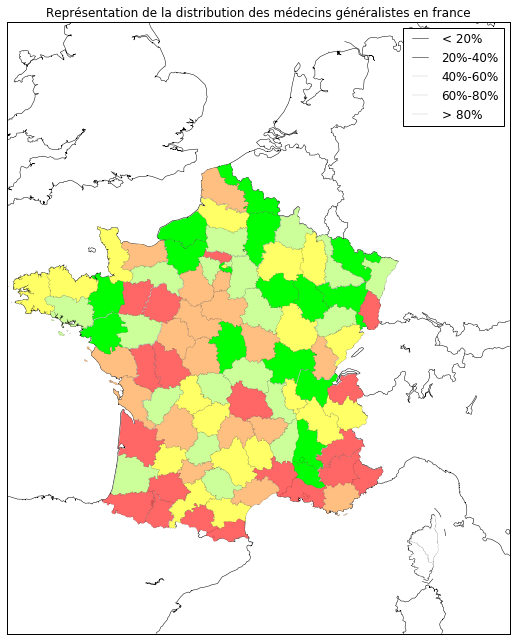

In [9]:
plt.close()
fig = plt.figure(figsize=(20,10))
#Custom adjust of the subplots
plt.subplots_adjust(left=0.05,right=0.95,top=0.90,bottom=0.05,wspace=0.15,hspace=0.05)
ax = plt.subplot(111)
#Let's create a basemap of Europe
x1 = -5.0
x2 = 12.
y1 = 40.
y2 = 54.

m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2)
m.drawcountries(linewidth=0.5)
m.drawcoastlines(linewidth=0.5)
if False:
    # provoque l'erreur
    # ValueError: All values in the dash list must be positive
    m.drawparallels(np.arange(y1,y2,2.),labels=[1,0,0,0],color='black',
                    dashes=[1,0],labelstyle='+/-',linewidth=0.2) # draw parallels
    m.drawmeridians(np.arange(x1,x2,2.),labels=[0,0,0,1],color='black',
                    dashes=[1,0],labelstyle='+/-',linewidth=0.2) # draw meridians


for record, shape in zip(records, shapes):
    # les coordonnées sont en Lambert 93
    geo_points = [lambert932WGPS(x,y) for x, y in shape.points]
    lons = [_[0] for _ in geo_points]
    lats = [_[1] for _ in geo_points]
    data = np.array(m(lons, lats)).T

    if len(shape.parts) == 1:
        segs = [data,]
    else:
        segs = []
        for i in range(1,len(shape.parts)):
            index = shape.parts[i-1]
            index2 = shape.parts[i]
            segs.append(data[index:index2])
        segs.append(data[index2:])

    lines = LineCollection(segs,antialiaseds=(1,))
    # pour changer les couleurs c'est ici, il faudra utiliser le champ records
    # pour les changer en fonction du nom du départements
    #lines.set_facecolors(cm.jet(np.random.rand(1)))
    try:
        int_dep = int(record[1])
        if dict_dep_dens[int_dep] < q_20:
            color = "#00ff00"
        elif (dict_dep_dens[int_dep] >= q_20) and (dict_dep_dens[int_dep] < q_40):
            color = "#ccff99"
        elif (dict_dep_dens[int_dep] >= q_40) and (dict_dep_dens[int_dep] < q_60):
            color = "#ffff66"
        elif (dict_dep_dens[int_dep] >= q_60) and (dict_dep_dens[int_dep] < q_80):
            color = "#ffbf80"
        else:
            color = "#ff6666"
    except ValueError:
        color = "#ffffff"
    lines.set_facecolors(color)
    lines.set_edgecolors('k')
    lines.set_linewidth(0.1)
    ax.add_collection(lines)
    
plt.title("Représentation de la distribution des médecins généralistes en france")
plt.legend(["< 20%", "20%-40%", "40%-60%", "60%-80%", "> 80%"])
plt.show()